1. Loading Dataset and Exploratory Analysis

In [ ]:
# --- Load Required Libraries ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Install API and upload the kaggle.json file for authentication ---
!pip install -q kaggle
from google.colab import files

# --- Upload API credentials file ---
files.upload()

# --- Setup API credentials ---
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# --- Download the dataset ---
!kaggle datasets download -d pavansubhasht/ibm-hr-analytics-attrition-dataset

# --- Unzip the dataset ---
!unzip ibm-hr-analytics-attrition-dataset.zip

# --- Load the dataset ---
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset
License(s): DbCL-1.0
Archive:  ibm-hr-analytics-attrition-dataset.zip
  inflating: WA_Fn-UseC_-HR-Employee-Attrition.csv  


In [ ]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
# --- Basic Exploration ---
print(df.shape)
print(df.info())
print(df.describe())

(1470, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel     

In [ ]:
# --- Check for Missing Values ---
print(df.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

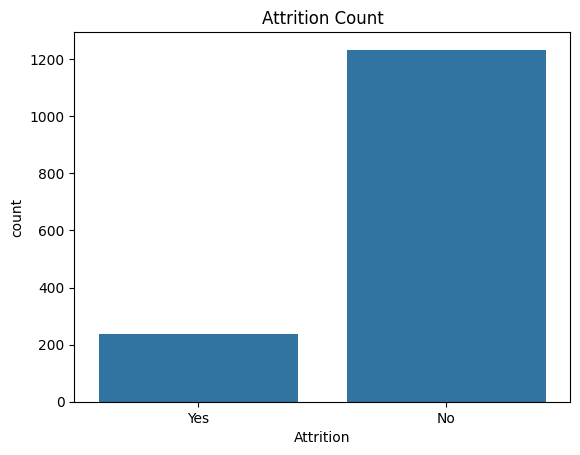

In [ ]:
# --- Attrition Distribution ---
sns.countplot(x='Attrition', data=df)
plt.title('Attrition Count')
plt.show()

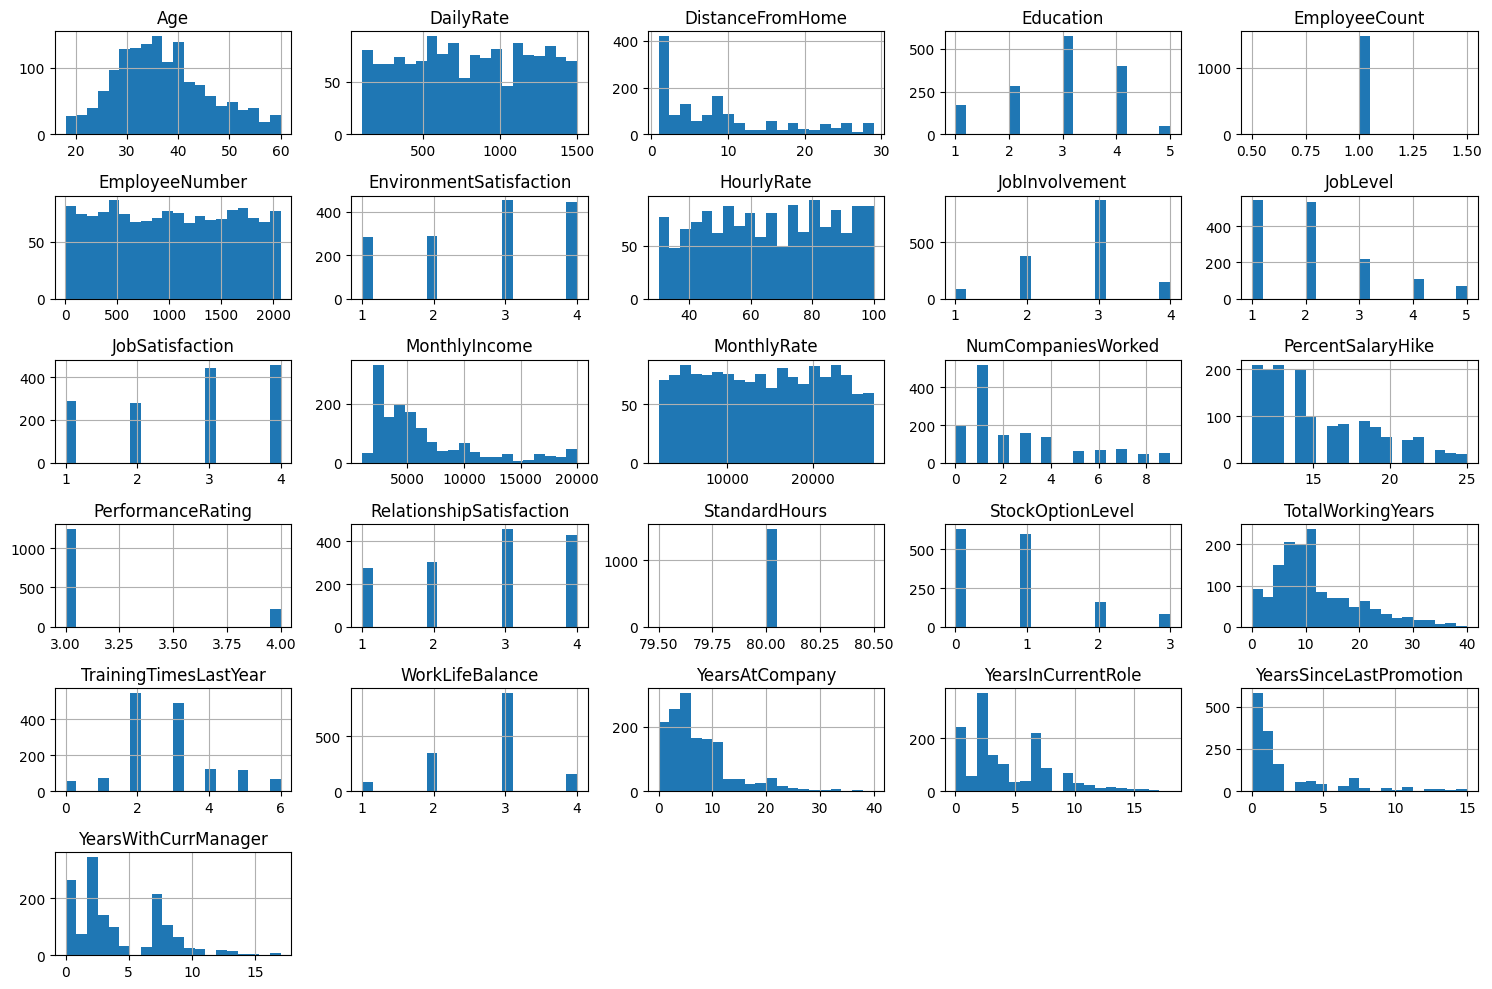

In [ ]:
# --- Numeric Distributions ---
df.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

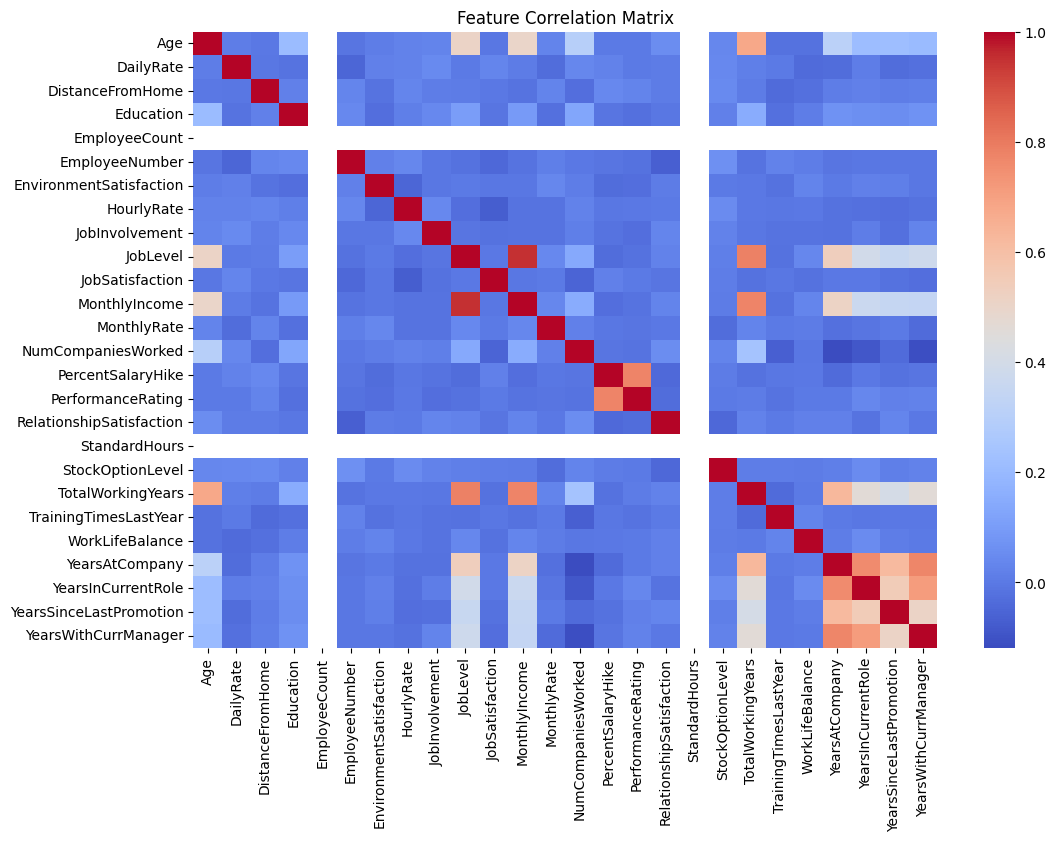

In [ ]:
# --- Correlation Heatmap ---
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

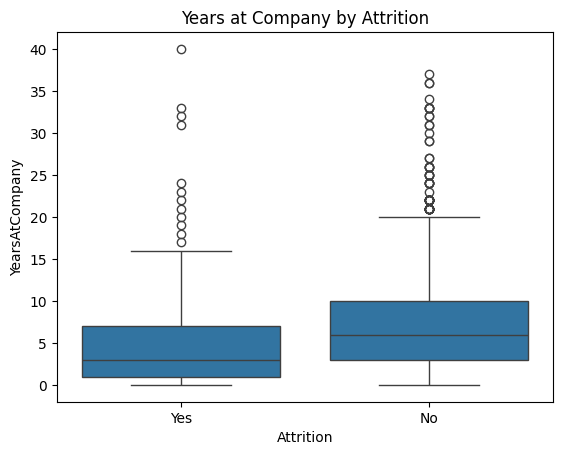

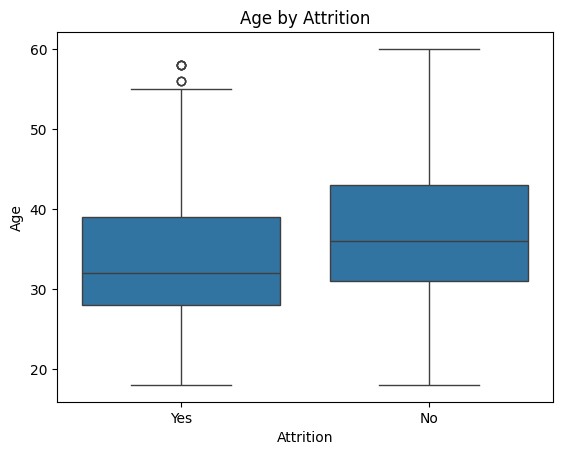

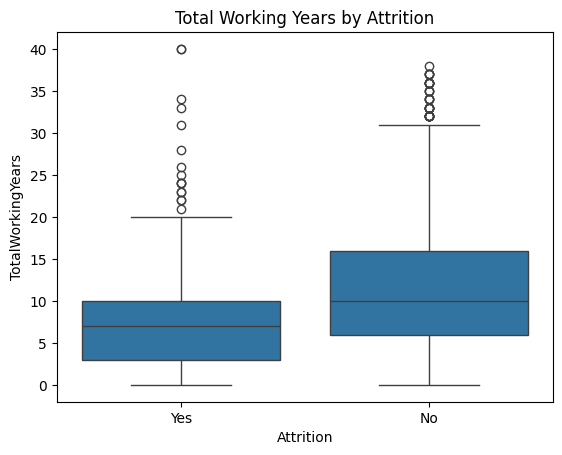

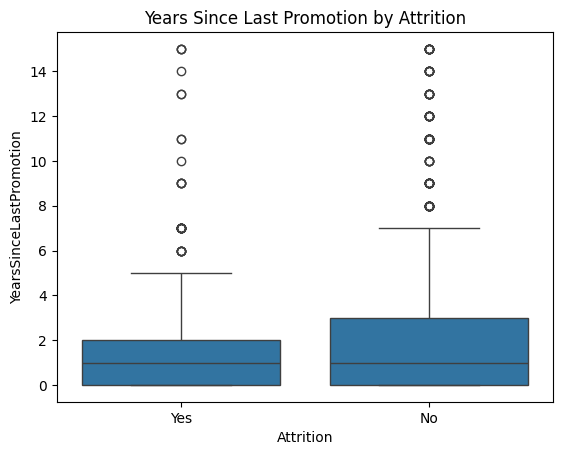

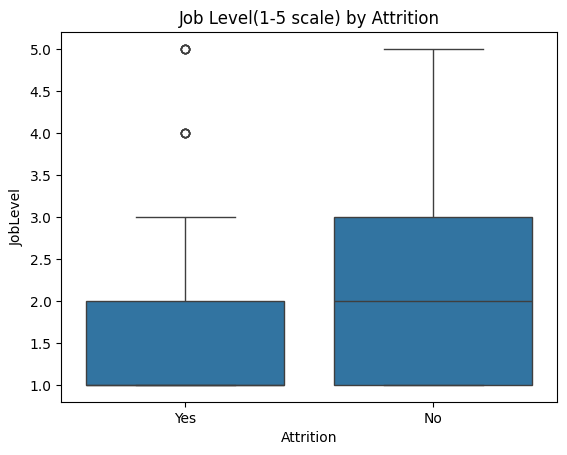

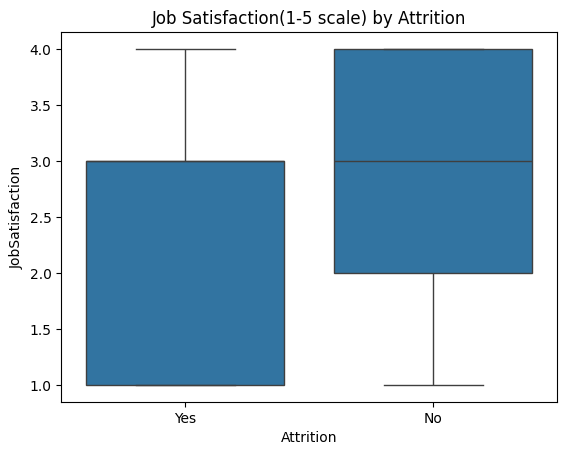

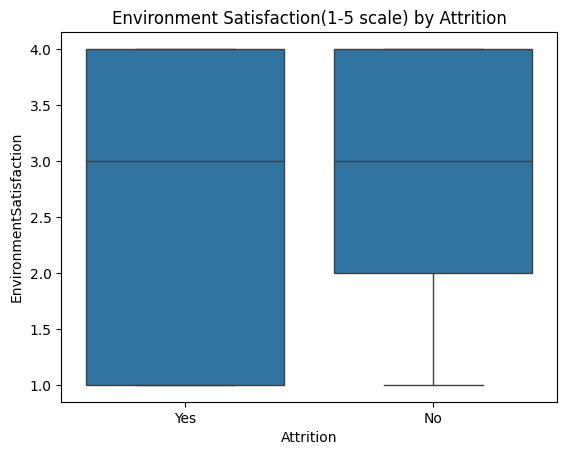

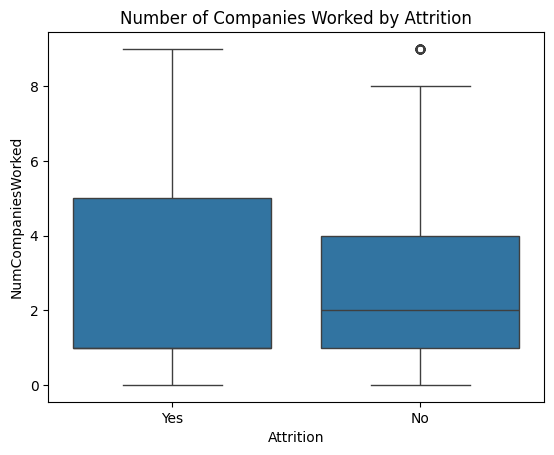

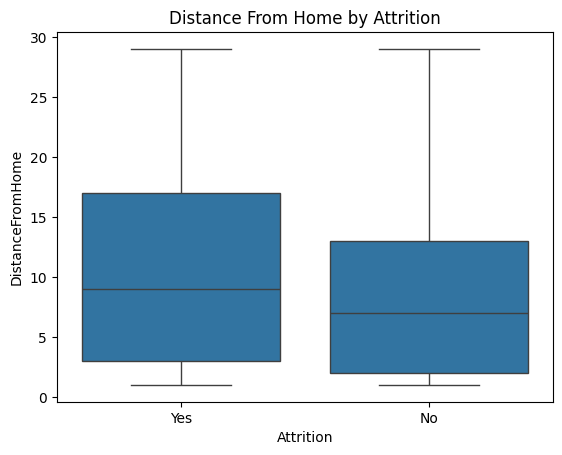

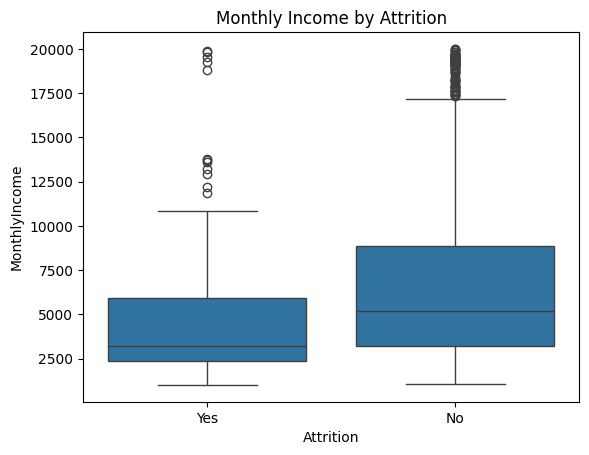

In [ ]:
# --- Attrition by Key Numeric Features ---

sns.boxplot(x='Attrition', y='YearsAtCompany', data=df)
plt.title('Years at Company by Attrition')
plt.show()

sns.boxplot(x='Attrition', y='Age', data=df)
plt.title('Age by Attrition')
plt.show()

sns.boxplot(x='Attrition', y='TotalWorkingYears', data=df)
plt.title('Total Working Years by Attrition')
plt.show()

sns.boxplot(x='Attrition', y='YearsSinceLastPromotion', data=df)
plt.title('Years Since Last Promotion by Attrition')
plt.show()

sns.boxplot(x='Attrition', y='JobLevel', data=df)
plt.title('Job Level(1-5 scale) by Attrition')
plt.show()

sns.boxplot(x='Attrition', y='JobSatisfaction', data=df)
plt.title('Job Satisfaction(1-5 scale) by Attrition')
plt.show()

sns.boxplot(x='Attrition', y='EnvironmentSatisfaction', data=df)
plt.title('Environment Satisfaction(1-5 scale) by Attrition')
plt.show()

sns.boxplot(x='Attrition', y='NumCompaniesWorked', data=df)
plt.title('Number of Companies Worked by Attrition')
plt.show()

sns.boxplot(x='Attrition', y='DistanceFromHome', data=df)
plt.title('Distance From Home by Attrition')
plt.show()

sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Monthly Income by Attrition')
plt.show()

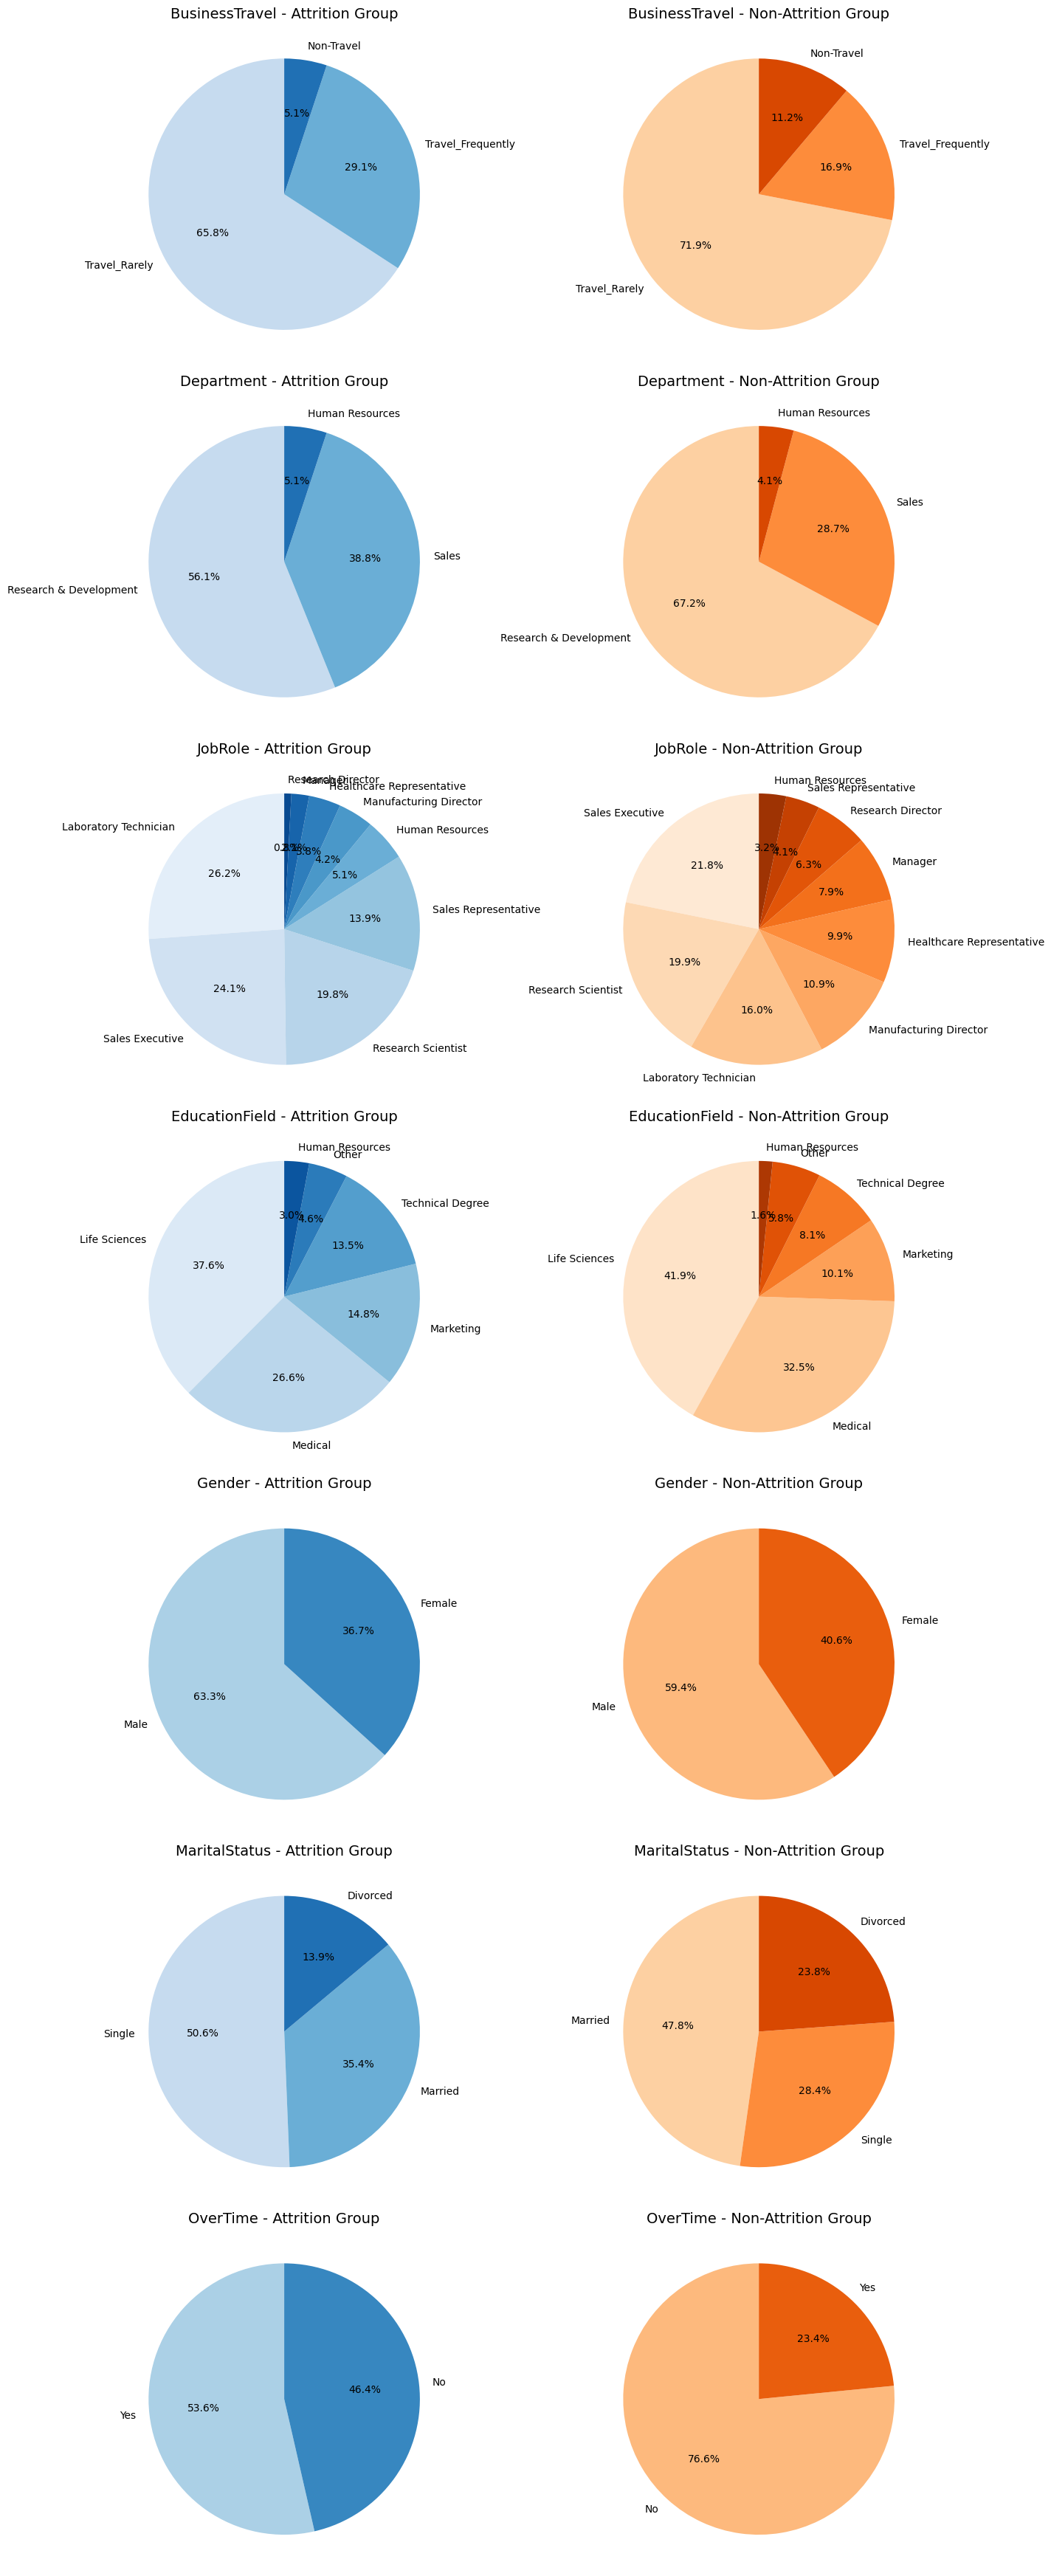

In [ ]:
# --- Distribution of Key Categorical Figures by Attrition ---
categorical_variables = ['BusinessTravel', 'Department', 'JobRole', 'EducationField', 'Gender', 'MaritalStatus', 'OverTime']

# Set up the figure for multiple subplots
fig, axes = plt.subplots(len(categorical_variables), 2, figsize=(14, len(categorical_variables) * 5))

# Loop over each categorical variable to plot the dual pie charts
for i, var in enumerate(categorical_variables):
    # Count the occurrences of each category for both attrition and non-attrition groups
    attrition_counts = df[df['Attrition'] == 'Yes'][var].value_counts()
    non_attrition_counts = df[df['Attrition'] == 'No'][var].value_counts()

    # Plot Pie Chart for Attrition group
    axes[i, 0].pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Blues", len(attrition_counts)))
    axes[i, 0].set_title(f'{var} - Attrition Group', fontsize=14)

    # Plot Pie Chart for Non-Attrition group
    axes[i, 1].pie(non_attrition_counts, labels=non_attrition_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Oranges", len(non_attrition_counts)))
    axes[i, 1].set_title(f'{var} - Non-Attrition Group', fontsize=14)

# Adjust layout to ensure subplots fit without overlapping
plt.tight_layout()
plt.show()

2. Data Preprocessing for Clustering

In [ ]:
# --- Load Required Libraries ---
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# --- Encode Categorical Columns ---
df_encoded = df.copy()
label_cols = df_encoded.select_dtypes(include='object').columns
le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# --- Feature and Target Split ---
X = df_encoded.drop(['Attrition'], axis=1)
y = df_encoded['Attrition']

# --- Feature Scaling ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

3. Clustering

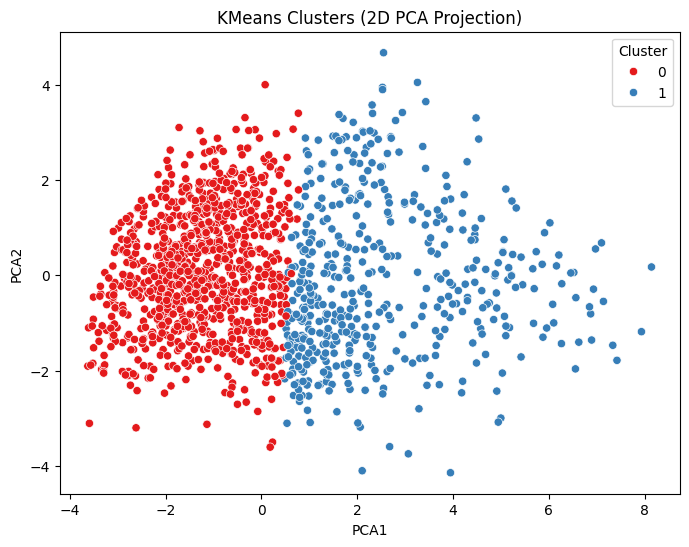

In [ ]:
# --- Load Required Libraries ---
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np

# --- Drop target column before clustering ---
X_cluster = pd.DataFrame(X_scaled, columns=X.columns)

# --- Apply KMeans with 2 clusters (likely to match Attrition = Yes/No) ---
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_cluster)

# --- Attach cluster label ---
df_encoded['Cluster'] = clusters

# --- PCA for 2D projection ---
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_cluster)
df_encoded['PCA1'] = pca_components[:, 0]
df_encoded['PCA2'] = pca_components[:, 1]

# --- Visualize clusters ---
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_encoded, palette='Set1')
plt.title('KMeans Clusters (2D PCA Projection)')
plt.show()

In [ ]:
# --- Add original Attrition label back ---
df_encoded['Attrition'] = y.values

# --- Compare attrition rates in each cluster ---
cluster_attrition = df_encoded.groupby('Cluster')['Attrition'].value_counts(normalize=True).unstack()
print(cluster_attrition)

Attrition         0         1
Cluster                      
0          0.804082  0.195918
1          0.908163  0.091837


5. Downloading Final Datasets for Dashboard Creation

In [ ]:
# --- Start from original DataFrame ---
df_export = df.copy()

# --- Add cluster labels ---
df_export['Cluster'] = df_encoded['Cluster']

# --- Add PCA components ---
df_export['PCA1'] = df_encoded['PCA1']
df_export['PCA2'] = df_encoded['PCA2']

# --- Rename and relabel Cluster column ---
df_export.rename(columns={'Cluster': 'AttritionLikelyCluster'}, inplace=True)
df_export['AttritionLikelyCluster'] = df_export['AttritionLikelyCluster'].map({0: 'Yes', 1: 'No'})

# --- Save to CSV ---
df_export.to_csv('final_attrition_project_data.csv', index=False)

# --- Download the file ---
files.download('final_attrition_project_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>